In [37]:
import random                   
import numpy as np              
import sys                      
import matplotlib.pyplot as plt

# Laberinto (No modificar)

In [38]:
"""Rellena un arreglo bidimensional con 1s o 0s de manera aleatoria"""
def inicializarMapa(mapa, P):
    for i in range(len(mapa)):
        for j in range(len(mapa[0])): 
            valor = random.uniform(0, 1) 
            if valor < P:
                mapa[i][j] = 1
                
def contarVecinosVivos(mapa, x, y):
    dimy = len(mapa)
    dimx = len(mapa[0])     
    contador = 0     
    for i in range(-1, 2):
        for j in range(-1, 2):             
            if (i == 0 and j == 0):
                pass 
            else:
                vecinox = x + i
                vecinoy = y + j 
                if (vecinox < 0 or vecinox >= dimx or vecinoy < 0 or vecinoy >= dimy):
                    contador += 1 
                else:
                    contador += mapa[vecinoy][vecinox] 
    return contador

In [39]:
def calcularPaso(mapa, lim_aislamiento, lim_nacimiento):
    dimy = len(mapa)
    dimx = len(mapa[0])
    mapa_aux = np.zeros((dimy, dimx), dtype = int)
    for x in range(dimx):
        for y in range(dimy):
            num_vecinos = contarVecinosVivos(mapa, x, y)
            if mapa[y][x] == 1: 
                if num_vecinos < lim_aislamiento:
                    mapa_aux[y][x] = 0
                else:
                    mapa_aux[y][x] = 1
            elif mapa[y][x] == 0: 
                if num_vecinos > lim_nacimiento:
                    mapa_aux[y][x] = 1
                else:
                    mapa_aux[y][x] = 0
    return mapa_aux

In [40]:
def dibujarMapa(mapa):
  plt.imshow(mapa)
  plt.colorbar()
  plt.show()

In [41]:
def floodFill(mapa, posy, posx, num_region):
    ysize = len(mapa)
    xsize = len(mapa[0])
    pila = set(((posy, posx),))
    area = 0
    while len(pila) > 0:
        y, x = pila.pop()
        area = area + 1
        if mapa[y][x] == 0:
            mapa[y][x] = num_region
            if y > 0:
                pila.add((y - 1, x))
            if y < (ysize - 1):
                pila.add((y + 1, x))
            if x > 0:
                pila.add((y, x - 1))
            if x < (xsize - 1):
                pila.add((y, x + 1))
    return area

In [42]:
def eliminarZonasAisladas(mapa):
    dimy = len(mapa)
    dimx = len(mapa[0])
    region = 2
    areas = []
    mapa_aux = np.copy(mapa)   
    for x in range(dimx):
        for y in range(dimy):
            if mapa_aux[y][x] == 0:
                areas.append(floodFill(mapa_aux, y, x, region))
                region = region + 1
    region_maxima = areas.index(max(areas)) + 2
    for x in range(dimx):
        for y in range(dimy):
            if mapa_aux[y][x] != 1 and mapa_aux[y][x] != region_maxima:
                mapa[y][x] = 1
    return mapa

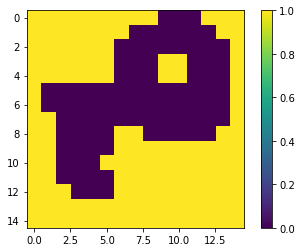

In [43]:
#dimx = max(int(input("Ancho del mapa: ")), 20)
#dimy = max(int(input("Alto del mapa: ")), 20)
dimx = 15
dimy = 15
#lim_aislamiento = int(input("Limite para aislamiento (recomendado 3): "))
lim_aislamiento = 3
#lim_nacimiento = int(input("Limite para nacimiento (recomendado 4): "))
lim_nacimiento = 4
#n = int(input("Num. de pasos para el automata celular (recomendado 5-6): "))
n = 5
#P = float(input("Probabilidad inicializar una casilla como viva (recomendado 0.4): "))
P = 0.4

""" La función *zeros* crea un arreglo  con el tipo de dato y las dimensiones dadas, está relleno con 0s"""
mapa = np.zeros((dimy,dimx), dtype=int)
inicializarMapa(mapa, P)
""" Básicamente, unifica los pasillos que estén juntos, para crear un área más grande """
for i in range(n):
    mapa = calcularPaso(mapa, lim_aislamiento, lim_nacimiento)

"""En caso de que existan zonas aisladas, las eliminará y luego obtendremos solamente una"""
mapa = eliminarZonasAisladas(mapa)
dibujarMapa(mapa)

# Indicaciones generales
Al ejecutar la siguiente celda de código se generará de forma automática un laberinto (diferente en cada ejecución) y se presentará su imagen para mayor referencia.
 
Dicho laberinto se encuentra almacenado en la variable **"mapa"**, este mapa es el que usaran como base para la aplicación del algoritmo de búsqueda "Primero en Profundidad" y "Primero en Anchura".
 
Como podrán ver la variable mapa es una matriz de 0 y 1, en donde los 1's corresponden a las paredes y los 0's a los pasillos libres.
 
Con esta información se necesita un programa que encuentre una ruta entre una coordenada inicial $i$ y una final $j$.
 
Implemente los algoritmos de búsqueda no informada "Primero en profundidad" y "Primero en anchura" para encontrar un camino entre los puntos ingresados por el usuario.
 
Al final tome la solución encontrada por el programa y sustituya las coordenadas por un valor de **0** en la matriz que corresponda e imprima el mapa resultante.

# Primero en profundidad

In [44]:
class Stack:
     def __init__(self):
         self.items = []

     def isEmpty(self):
         return self.items == []

     def push(self, item):
         self.items.append(item)

     def pop(self):
         return self.items.pop()

     def peek(self):
         return self.items[len(self.items)-1]

     def size(self):
         return len(self.items)

In [45]:
def askCoordenada(message):
    coordenadaInicial = input(message)
    i = coordenadaInicial.split(',')
    desired_array = [int(numeric_string) for numeric_string in i]
    return desired_array

def verifyCoordinates(mapa,i,j):
    if len(i) == 2 and len(j) == 2:
        if i[0] >= 0  and i[0] < dimx and i[1] >= 0  and i[1] < dimy and j[0] >= 0  and j[0] < dimx and j[1] >= 0  and j[1] < dimy:
            return mapa[i[1]][i[0]] == 0 and mapa[j[1]][j[0]] == 0
    return False


In [46]:
"""Para evitar que a  python le de amsiedad por usar recursión"""
sys.setrecursionlimit(1000000)

LABERINTO



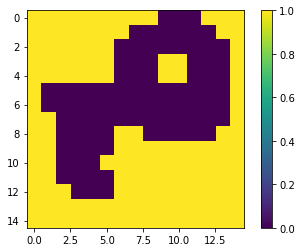


COORDENADA INICIAL:  [3, 11] . COORDENADA FINAL:  [11, 2] 



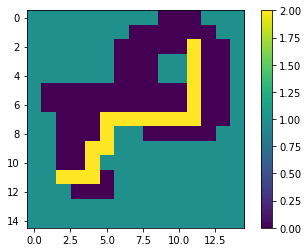

In [47]:
mapaProfundidad = mapa #Copia de la matríz original para dibujar la solución encontrada en profundidad

""" mapa[y][x] """

""" Aqui vamos a ir guardando el recorrido """
trace = Stack()
profundidad = 60

""" Le mostramos el mapa al usuario y le pedimos que elija un punto inicial y uno final""" 
print("LABERINTO\n")
dibujarMapa(mapaProfundidad) #Usen esta función para imprimir el mapa

""" Pedimos el punto inicial y el final """
flag = False
goal_coordinate = start_coordinate = []
while not flag:
    start_coordinate = askCoordenada("Dame la coordenada inicial: X,Y. Ejemplo: 3,5")
    goal_coordinate = askCoordenada("Dame la coordenada final: X,Y. Ejemplo: 8,9")
    profundidad = int(input("Dame la profundidad máxima"))
    flag = verifyCoordinates(mapaProfundidad,start_coordinate, goal_coordinate)


def depth_first_search_labyrinth(current_coordinate):
    trace.push(current_coordinate)
    x = current_coordinate[0]
    y = current_coordinate[1]
    if x == goal_coordinate[0] and y == goal_coordinate[1]:
        return True
    else:
        if trace.size() < profundidad:
            if x-1 >= 0 and mapaProfundidad[y][x-1] == 0:
                if depth_first_search_labyrinth([x-1,y]):
                    return True
            if x+1 < dimx and mapaProfundidad[y][x+1] == 0:
                if depth_first_search_labyrinth([x+1,y]):
                    return True
            if y-1 >= 0 and mapaProfundidad[y-1][x] == 0:
                if depth_first_search_labyrinth([x,y-1]):
                    return True
            if y+1 < dimy and mapaProfundidad[y+1][x] == 0:
                if depth_first_search_labyrinth([x,y+1]):
                    return True
    trace.pop()
    return False

result = depth_first_search_labyrinth(start_coordinate)

if result:
    while not trace.isEmpty():
        titan_fundador = trace.pop()
        mapaProfundidad[titan_fundador[1]][titan_fundador[0]] = 2
    print("\nCOORDENADA INICIAL: ",start_coordinate,". COORDENADA FINAL: ",goal_coordinate,"\n")
    dibujarMapa(mapaProfundidad)
else:
    print("Lo sentimos, no se ha encontrado una solución. :c")





# Primero en anchura

In [48]:
mapaAnchura = mapa #Copia de la matríz original para dibujar la solución encontrada en anchura